In [1]:
from concise.hyopt import CMongoTrials, get_data
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm
import data

%matplotlib inline  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

def print_exp(exp_name):
    print("-" * 40 + "\nexp_name: " + exp_name)


DIR_ROOT = "/s/project/deepcis/encode/eclip/"
DIR_ROOT = "/home/avsec/projects-work/deepcis/data/encode/eclip/"
RBP_LIST = ["UPF1", "PUM2", "DDX3X", "NKRF", "TARDBP", "SUGP2"]

DB_NAME = "RBP__Eclip"
HOST = "ouga03"
#HOST = "localhost"

#EXPERIMENTS = ["DeepNN",
#               "DeepNN_scalar_position_gam",
#               "DeepNN_scalar_position_relu",
#               "DeepNN_track_position_gam",
#               "DeepNN_track_position_relu"]
EXPERIMENTS = ["DeepNN_2",
               "DeepNN_scalar_position_gam_2",
               "DeepNN_scalar_position_relu_2"]
data_fn = data.data

Using TensorFlow backend.


In [2]:
def get_big_df(exp_name, rbp_list):
    df_list = [CMongoTrials(DB_NAME, exp_name + "_" + rbp, ip=HOST).as_df().assign(rbp=rbp) for rbp in tqdm(rbp_list)]
    return pd.concat(df_list)

In [18]:
all_df = pd.concat([get_big_df(exp_name, RBP_LIST).assign(exp=exp_name) for exp_name in EXPERIMENTS])

In [17]:
all_df.head(3)

,eval.acc,eval.auc,eval.auprc,eval.loss,exp,loss,n_epoch,name.data,name.loss_metric,name.loss_metric_mode,name.model,param.data.n_bases,param.data.pos_as_track,param.data.pos_class_weight,param.data.rbp_name,param.data.scale_raw,param.data.test_chr,param.data.valid_chr,param.fit.batch_size,param.fit.early_stop_monitor,param.fit.epochs,param.fit.patience,param.fit.use_weight,param.model.activation,param.model.dropout_rate,param.model.external_pos,param.model.external_pos.as_track,param.model.external_pos.scale,param.model.external_pos.type,param.model.external_pos.units,param.model.filters,param.model.internal_pos.name,param.model.internal_pos.pool_size,param.model.lr,param.model.use_batchnorm,param.shared.kernel_size,path.model,path.results,rbp,status,tid,time.duration.dataload,time.duration.total,time.duration.training,time.end,time.start
0,0.8238,0.8020,0.5548,0.4084,DeepNN_2,-0.5548,37,data,auprc,auprc,model,30,False,1.0,UPF1,True,"[2, 4, 6, 8, 10]","[1, 3]",128,val_loss,150,5,False,relu,0.0330,None,NaN,NaN,NaN,NaN,16,strided_maxpool,4,0.0004,False,11,/s/project/deepcis/hy...,/s/project/deepcis/hy...,UPF1,ok,3879,46.1098,266.1382,220.0284,2017-06-04 17:03:58.5...,2017-06-04 16:59:32.4...
1,0.8220,0.7925,0.5414,0.4098,DeepNN_2,-0.5414,15,data,auprc,auprc,model,20,False,1.0,UPF1,True,"[2, 4, 6, 8, 10]","[1, 3]",128,val_loss,150,5,False,relu,0.2069,None,NaN,NaN,NaN,NaN,16,strided_maxpool,4,0.0004,True,11,/s/project/deepcis/hy...,/s/project/deepcis/hy...,UPF1,ok,3880,38.8495,636.1002,597.2506,2017-06-04 17:10:08.8...,2017-06-04 16:59:32.7...
2,0.8225,0.7890,0.5344,0.4130,DeepNN_2,-0.5344,13,data,auprc,auprc,model,20,False,1.0,UPF1,True,"[2, 4, 6, 8, 10]","[1, 3]",128,val_loss,150,5,False,relu,0.1994,None,NaN,NaN,NaN,NaN,16,strided_maxpool,4,0.0007,True,11,/s/project/deepcis/hy...,/s/project/deepcis/hy...,UPF1,ok,3881,39.4462,564.3575,524.9113,2017-06-04 17:08:57.0...,2017-06-04 16:59:32.7...


## All

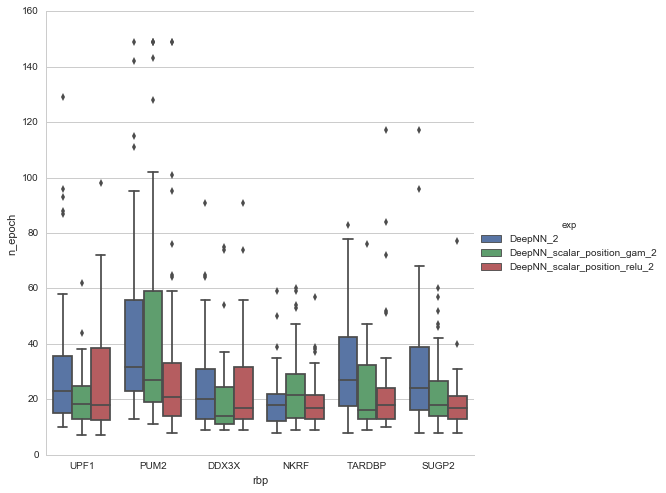

In [16]:
sns.factorplot(x="rbp", y="n_epoch", hue="exp",
               data=all_df, kind="box", size=7)

In [35]:
df_top10 = all_df.sort_values("loss").groupby(["exp", "rbp"]).head(20).reset_index()

## Top 20

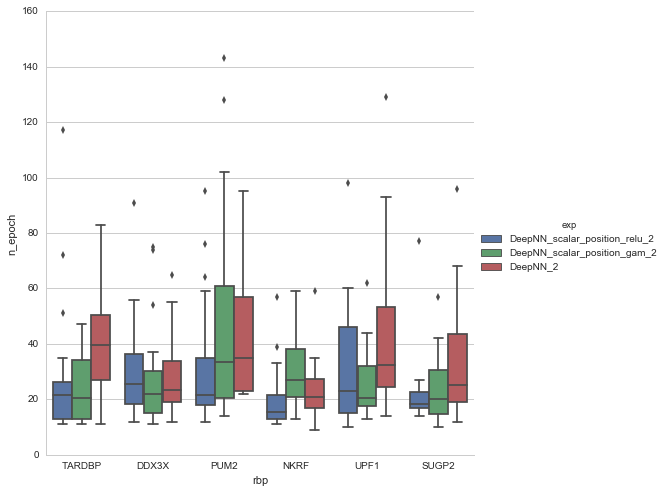

In [53]:
sns.factorplot(x="rbp", y="n_epoch", hue="exp",
               data=df_top10, kind="box", size=7)